# <center> python 网络编程</center>

熟悉网络协议的朋友肯定对TCP和UDP协议都有所了解。作为传输层的重要协议，TCP和UDP协议是TCP/IP协议的核心。<br>

&ensp;&ensp;**传输控制协议（TCP）：**TCP（传输控制协议）定义了两台计算机之间进行可靠的传输而交换的数据和确认信息的格式，以及计算机为了确保数据的正确到达而采取的措施。协议规定了TCP软件怎样识别给定计算机上的多个目的进程如何对分组重复这类差错进行恢复。协议还规定了两台计算机如何初始化一个TCP数据流传输以及如何结束这一传输。TCP最大的特点就是提供的是**面向连接**、**可靠**的**字节流**服务。<br><br>
&ensp;&ensp;**用户数据报协议（UDP）：**UDP（用户数据报协议）是一个简单的面向数据报的传输层协议。提供的是**非面向连接的**、**不可靠**的数据流传输。UDP不提供可靠性，也不提供报文到达确认、排序以及流量控制等功能。它只是把应用程序传给IP层的数据报发送出去，但是并不能保证它们能到达目的地。因此报文可能会丢失、重复以及乱序等。但由于UDP在传输数据报前不用在客户和服务器之间建立一个连接，且没有超时重发等机制，故而传输速度很快。<br>

## 1. TCP 协议

TCP是端到端的协议，采用的是客户-服务器模式，因此在通信时，涉及到了客户和服务器双方。客户和服务器之间的通信是通过socket套接字实现的。定义套接字的格式如下：**socket套接字 = （IP地址, 端口号）**。客户端和服务器建立socket通信需要经过下图所示的过程。


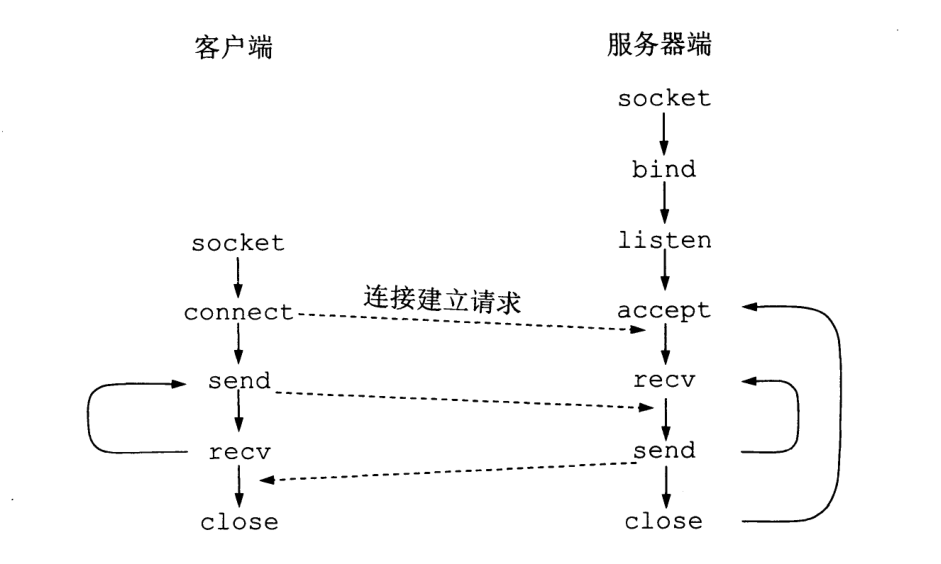

图片来源:谢希仁.计算机网络教材.P311页

### 1.1 服务器端（server）

Python提供了socket模块建立TCP的简单服务器。该模块包含的函数和类定义可生成通过网络通信的程序。创建一个socket通信大致需要以下6个步骤：

**（1）创建socket对象**

在Python中，我们用socket()函数创建套接字，语法格式如下：```socket.socket([family[, type[, protocol]]])```<br>
- family：可以是AF_UNIX（UNIX域，用于同一台机器上的进程间通信），也可以是AF_INET（对于IPv4协议的TCP和UDP）或AF_INET6（对于IPv6）。
- type：套接字类型可以根据面向连接和非连接分为SOCK_STREAM（流套接字）或SOCK_DGRAM（数据报文套接字）。
- protocol：一般不填，默认为0。family参数指定调用者期待返回的套接口地址结构的类型。

**（2） 绑定socket到指定地址**

将socket绑定（指派）到指定地址上，使用```socket.bind(address)```。其中address必须是一个双元素元组（(host,port)），参数为主机名或IP地址＋端口号。如果端口号正在被使用或保留，主机名或IP地址错误，就会引发socke.error异常。

**（3）  监听客户端连接请求**

绑定后必须准备好套接字，以便接受连接请求。请求方式如下：```socket.listen(backlog)```。backlog用于指定最多连接数，至少为1。接到连接请求后，这些请求必须排队，如果队列已满，就拒绝请求。

**(4) 接受客户端请求**

服务器套接字通过socket的accept方法等待客户请求一个连接。请求方式如下：```connection, address = socket.accept()```。  调用accept方法时，socket会进入等待（或阻塞）状态。客户请求连接时，accept方法建立连接并返回服务器。accept方法返回一个含有两个元素的元组，如（connection, address）。第一个元素（connection）是新的socket对象，服务器通过它与客户通信；第二个元素（address）是客户的互联网地址。

**(5) 收发数据**

收发数据阶段，服务器和客户通过send和recv方法通信（传输数据）。服务器调用send，并采用字符串形式向客户发送信息。send方法返回已发送的字符个数。服务器使用recv方法从客户接收信息。调用recv时，必须指定一个整数控制本次调用所接收的最大数据量。recv方法在接收数据时会进入blocket状态，最后返回一个字符串，用于表示收到的数据。如果发送的量超过recv允许的量，数据就会被截断。多余的数据将缓冲于接收端。以后调用recv时，多余的数据会从缓冲区删除。

**（6） 传输结束**

服务器调用socket的close方法以关闭连接。

### 1.2 客户端（Client）

建立一个简单的客户连接需要4个步骤：

①　创建一个socket以连接服务器socket=socket.socket(family,type)。

②　使用socket的connect方法连接服务器socket.connect((host,port))。

③　客户和服务器通过send和recv方法通信。

④　结束后，客户通过调用socket的close方法关闭连接。

### 1.3 套接字函数接口

<center>**服务器端**</center> 

 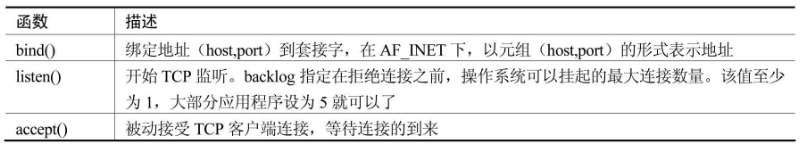

<center>**客户端**</center> 

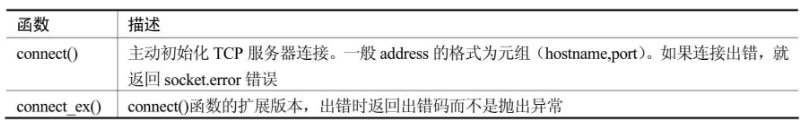

<center>**通用套接字**</center>

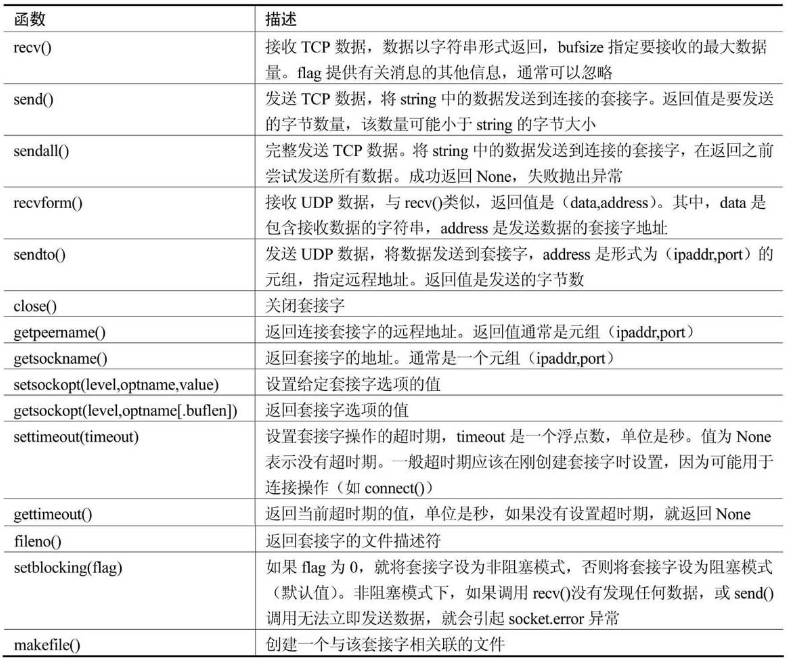

<center>图片来源: Python 3.7从零开始学／刘宇宙，刘艳编著 15.3节</center>

### 1.4 TCP编程实现

In [ ]:
# -------------server.py-------
#             服务器端源码
#------------------------------

import socket
import threading
import time


def socket_server():
    
    # 1.创建socket对象
    server_socket = socket.socket(socket.AF_INET,socket.SOCK_STREAM)
    host = socket.gethostname()
    port = 9999
    
    # 2. 绑定端口
    server_socket.bind((host, port))
    
    # 3. 监听端口，设置最大连接数
    server_socket.listen(5)
    print("正在监听......")
    while True:
        # 4. 接受连接请求
        sock ,addr = server_socket.accept()
        
        # 5. 创建线程处理TCP连接
        t = threading.Thread(target = tcp_link, args = (sock, addr))
        t.start()
        
def tcp_link(sock ,addr):
    print(f" {addr} 正在请求连接........")
    sock.send("欢迎您连接到服务器........".encode('utf-8'))
    while True:
        data = sock.recv(1024)
        time.sleep(1)
        if data and data.decode('utf-8') != "exit":
            print(data.decode('utf-8'))
            sock.send("服务器正在接收数据,请稍等........".encode('utf-8'))
        else:
            break
        
    # 6. 关闭连接 
    sock.close()
    print(f"{addr} 已断开连接.")
    
if __name__ == "__main__":
    socket_server()

<left>由于交互式编程不好操作，这是另外一个集成工具运行server的结果：</left>
 
 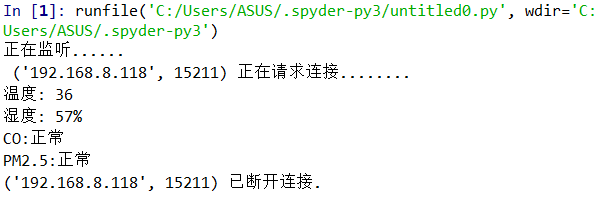

In [9]:
# -------------client.py-------
#            客户端源码
#------------------------------

import socket
import time

send_data = ["温度: 36", "湿度: 57%", "CO:正常", "PM2.5:正常"]
def socket_client():
    # 1.创建socket对象
    client_socket = socket.socket(socket.AF_INET,socket.SOCK_STREAM)
    host = socket.gethostname()
    port = 9999
    
    # 2. 建立连接
    sc = client_socket.connect((host, port))
    if sc == socket.error:
        print("连接错误.")
    else:
        print("正在向服务器发起连接........")
    # 3. 收发数据
    
    print(client_socket.recv(1024).decode('utf-8'))
    
    for data in send_data:
        client_socket.send(data.encode('utf-8'))
        print(client_socket.recv(1024).decode('utf-8'))
        time.sleep(1)
    time.sleep(2)
    client_socket.send(b'exit')
    
    # 4.关闭连接
    client_socket.close()
    print("断开连接........")
    
if __name__ == "__main__":
    socket_client()

正在向服务器发起连接........
欢迎您连接到服务器........
服务器正在接收数据,请稍等........
服务器正在接收数据,请稍等........
服务器正在接收数据,请稍等........
服务器正在接收数据,请稍等........
断开连接........


## 2. UDP 协议

TCP用于建立可靠连接，并且通信双方可以以流的形式发送数据。相对于TCP，UDP面向无连接的协议。使用UDP协议时不需要建立连接，只需要知道对方的IP地址和端口号就可以直接发送数据包。但是发送的数据包是否能到达就不知道了。虽然用UDP传输数据不可靠，但是优点是速度快。对于不要求可靠到达的数据可以使用UDP协议。

### 2.1 UDP编程实现

In [ ]:
# -------------server.py-------
#             服务器端源码
#------------------------------
import socket

def udp_socket_server():
    # 1. 建立socket连接
    udp_server = socket.socket(socket.AF_INET, socket.SOCK_DGRAM) #此处和tcp略有不同
    host = socket.gethostname()
    port = 9999
    
    # 2.绑定端口
    udp_server.bind((host, port))
    print("已经绑定端口，等待连接....")
    while True:
        # 3. 处理数据
        data, addr = udp_server.recvfrom(1024)
        print(data.decode('utf-8'))
        udp_server.sendto("服务器正在接收数据，请稍候....".encode('utf-8'),addr)
    
if __name__ == "__main__":
    udp_socket_server()

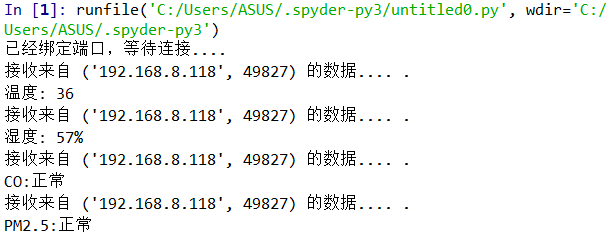

In [1]:
# -------------client.py-------
#            客户端源码
#------------------------------
import socket

send_data = ["温度: 36", "湿度: 57%", "CO:正常", "PM2.5:正常"]

def udp_socket_client():
    # 1. 建立socket连接
    udp_client = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
    for data in send_data:
        host = socket.gethostname()
        port = 9999
        #2. 数据处理
        udp_client.sendto(data.encode('utf-8'), (host, port))
        print(udp_client.recv(1024).decode('utf-8'))
    udp_client.close()
    
    
if __name__ == "__main__":
    udp_socket_client()

服务器正在接收数据，请稍候....
服务器正在接收数据，请稍候....
服务器正在接收数据，请稍候....
服务器正在接收数据，请稍候....


python 的网络编程到此结束，常用的和网络有关的模块urllib在此处不做展开。相关知识可以结合爬虫部分学习。